In [1]:
INPUTFILE = 'input-14-test.txt'

with open(INPUTFILE, 'r') as file:
    input = file.read()
rows = input.split("\n")

In [7]:
rocks = set()
lowest_rock = 0
leftest_rock = 500
rightest_rock = 500
for row in rows:
  tuples = row.split(" -> ")
  for tuple_index in range(len(tuples)-1):
    coord1 = [int(i) for i in tuples[tuple_index].split(",")]
    coord2 = [int(i) for i in tuples[tuple_index+1].split(",")]
    start_x = min(coord1[0], coord2[0])
    end_x = max(coord1[0], coord2[0])
    start_y = min(coord1[1], coord2[1])
    end_y = max(coord1[1], coord2[1])

    for x in range(start_x, end_x+1):
      for y in range(start_y, end_y+1):
        rocks.add((x,y))
        if y > lowest_rock:
          lowest_rock = y
        if x > rightest_rock:
          rightest_rock = x
        if x < leftest_rock:
          leftest_rock = x

In [11]:
for x in range(leftest_rock-2, rightest_rock+2):
    rocks.add((x, lowest_rock+2))

In [4]:
sand = set()
source = (500,0)

abyss = False
while not abyss:
  new_sand = source
  rested = False
  while not rested:    
    if (new_sand[0], new_sand[1]+1) not in rocks.union(sand):
      new_sand = (new_sand[0], new_sand[1]+1)
    elif (new_sand[0]-1, new_sand[1]+1) not in rocks.union(sand):
      new_sand = (new_sand[0]-1, new_sand[1]+1)
    elif (new_sand[0]+1, new_sand[1]+1) not in rocks.union(sand):
      new_sand = (new_sand[0]+1, new_sand[1]+1)
    else:
      sand.add(new_sand)
      rested = True
    if new_sand[1] > lowest_rock:
      print("aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa......................")
      abyss = True
      break

aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa......................


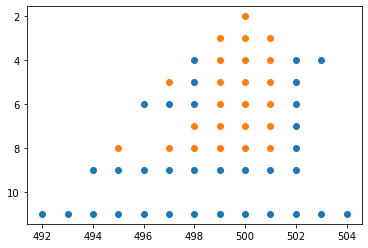

In [12]:
from matplotlib import pyplot as plt
import numpy as np

plotrocks = np.array(list(rocks))
plotsand = np.array(list(sand))

plt.scatter(plotrocks[:,0], plotrocks[:,1])
plt.scatter(plotsand[:,0], plotsand[:,1])

ax = plt.gca()
ax.invert_yaxis()

plt.show()

In [58]:
len(sand)

1078